# Data exploration

Suppose you've got an XML-file and want to build something useful. Take a look at it.

In [1]:
!head -n 25 ../data/001.xml

<?xml version="1.0"?>
<xf>
  <reactions>
    <reaction index="26">
      <RX>
        <RX.ID>9185275</RX.ID>
        <RX01>
          <RX.RXRN>1706223</RX.RXRN>
          <RX.RCT>L-leucine tert-butyl ester</RX.RCT>
        </RX01>
        <RX01>
          <RX.RXRN>9297179</RX.RXRN>
          <RX.RCT>(S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoic acid</RX.RCT>
        </RX01>
        <RX02>
          <RX.PXRN>9307186</RX.PXRN>
          <RX.PRO>(S)-2-[(S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoylamino]-4-methylpentanoic acid tert-butyl ester</RX.PRO>
        </RX02>
        <RX.BLB>1706223</RX.BLB>
        <RX.BLB>9297179</RX.BLB>
        <RX.BLB>9307186</RX.BLB>
        <RX.BLC>1706223</RX.BLC>
        <RX.BLC>9297179</RX.BLC>
        <RX.BLC>9307186</RX.BLC>
        <RX.NVAR>1</RX.NVAR>


lxml is the fastest way to process xml file in Python.

In [2]:
from lxml import etree as ElementTree

In [3]:
tree = ElementTree.parse("../data/001.xml")
root = tree.getroot()

In [4]:
root.getchildren()

[<Element reactions at 0x7f8340089748>]

In [5]:
len(root.getchildren()[0].getchildren())

2977

In [6]:
root.getchildren()[0].getchildren()[0].getchildren()

[<Element RX at 0x7f83400136c8>,
 <Element RXD at 0x7f8340013748>,
 <Element RY at 0x7f8340013a08>]

# RX

In [7]:
rx, rxd, ry = root.getchildren()[0].getchildren()[0].getchildren()

In [8]:
rx.getchildren()

[<Element RX.ID at 0x7f8340089b08>,
 <Element RX01 at 0x7f8340013b88>,
 <Element RX01 at 0x7f8340013b48>,
 <Element RX02 at 0x7f8340013bc8>,
 <Element RX.BLB at 0x7f8340013d08>,
 <Element RX.BLB at 0x7f8340013d48>,
 <Element RX.BLB at 0x7f8340013d88>,
 <Element RX.BLC at 0x7f8340013dc8>,
 <Element RX.BLC at 0x7f8340013e08>,
 <Element RX.BLC at 0x7f8340013e48>,
 <Element RX.NVAR at 0x7f8340013e88>,
 <Element RX03 at 0x7f8340013ec8>,
 <Element RX04 at 0x7f8340013f08>,
 <Element RX.RXNFILE at 0x7f8340013f48>,
 <Element RX.REG at 0x7f8340013f88>,
 <Element RX.RANK at 0x7f8340013fc8>,
 <Element RX.MYD at 0x7f834008b048>,
 <Element RX.SKW at 0x7f834008b088>,
 <Element RX.RTYP at 0x7f834008b0c8>,
 <Element RX.RTYP at 0x7f834008b108>,
 <Element RX.RAVAIL at 0x7f834008b148>,
 <Element RX.PAVAIL at 0x7f834008b188>,
 <Element RX.MAXPUB at 0x7f834008b1c8>,
 <Element RX.NUMREF at 0x7f834008b208>,
 <Element RX.MAXPMW at 0x7f834008b248>,
 <Element RX.ED at 0x7f834008b288>,
 <Element RX.UPD at 0x7f834

RX01, RX02 are reactants and products respectively.

In [9]:
print("Reactant #1:", rx[1].getchildren()[1].text)
print("Reactant #2:", rx[2].getchildren()[1].text)
print("Product:", rx[3].getchildren()[1].text)

Reactant #1: L-leucine tert-butyl ester
Reactant #2: (S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoic acid
Product: (S)-2-[(S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoylamino]-4-methylpentanoic acid tert-butyl ester


What are RX03 and RX04?

In [10]:
print(ElementTree.tostring(rx[11]).decode("utf-8"))

<RX03>
          <RX.BCODE>261039242542204</RX.BCODE>
          <RX.MCODE>325399193666863</RX.MCODE>
          <RX.NCODE>334727620812468</RX.NCODE>
        </RX03>
        


In [11]:
print(ElementTree.tostring(rx[12]).decode("utf-8"))

<RX04>
          <RX.TRANS highlight="true"><hi>0/80F51(0205)|80F42(030406)|40F61()|01E62()|01E41(0708)|01E41(090A)|01D42(0C0D)|01D41(0E)|01D41(0B)|01D41(0F)|01CB1(101113)|01C62()|01C61(12)|01C41(1415)|01C41(1617)|01B45(191A)|01B45(1B1C)|01B41(1D1E1F)|01B41(18)|01B41()|01B41()|01B41()|01B41()|01A51(2425)|01A45(20)|01A45(21)|01A45(22)|01A45(23)|01A41()|01A41()|01A41()|01945(2A)|01945(2A)|01945(2B)|01945(2B)|01942(2628)|01942(2729)|01862()|01862()|01845(292C)|01845(2D)|01845()|01845()|01745(2E)|01745(2F)|01645(2F)|01645()|</hi></RX.TRANS>
          <RX.BIN>283141</RX.BIN>
          <RX.BFREQ>469</RX.BFREQ>
          <RX.BRANGE>282515-283231</RX.BRANGE>
          <RX.BNAME>NH2 + -(C=)-O- to -NH-C(=)-</RX.BNAME>
          <RX.QRY0>0/80F51(02*)|80F42(03*)|40F61()|*</RX.QRY0>
          <RX.QRY1>0/80F51(02*)|80F42(03*)|40F61()|01E62(*)|01E41(*)|01E41(*)|*</RX.QRY1>
          <RX.QRY2>0/80F51(0205)|80F42(030406)|40F61()|01E62(*)|01E41(*)|01E41(*)|*</RX.QRY2>
          <RX.QRY3>0/80F51(0205)|80

🤔

RTYP stands for 'reaction type', what's that?

In [12]:
[c for c in rx.getchildren() if c.tag == "RX.RTYP"][0].text

'full reaction'

In [13]:
[c for c in rx.getchildren() if c.tag == "RX.RTYP"][1].text

'has preparation'

🤔🤔🤔

# RXD

In [14]:
rxd.getchildren()

[<Element RXD.L at 0x7f8340013888>,
 <Element RXD.CL at 0x7f834008bd48>,
 <Element RXD.SCO at 0x7f834008bdc8>,
 <Element RXD.STP at 0x7f834008bf48>,
 <Element RXD01 at 0x7f834008bf88>,
 <Element RXDS01 at 0x7f834008bfc8>,
 <Element citations at 0x7f8340016048>]

In [15]:
l, cl, sco, stp, rxd01, rxds01, cit = rxd.getchildren()

In [16]:
l.text, cl.text, sco.text

('6375709', 'Preparation', '17')

In [17]:
print(ElementTree.tostring(cit).decode("utf-8"))

<citations>
          <citation index="93">
            <CNR>
              <CNR.CNR>6375709</CNR.CNR>
              <CNR.CED>2007/10/03</CNR.CED>
              <CNR.CUPD>2018/08/19</CNR.CUPD>
            </CNR>
            <CIT>
              <CIT.DT>Article</CIT.DT>
              <CIT.AU>Kim, Jaeseung; Glekas, Athanasios; Sieburth, Scott McN</CIT.AU>
              <CIT.ABPR>Y</CIT.ABPR>
              
              <CIT.PREPY>2002</CIT.PREPY>
              <CIT.PUI>35346502</CIT.PUI>
              <CIT01>
                <CIT.CO>BMCLE</CIT.CO>
                <CIT.JT>Bioorganic and Medicinal Chemistry Letters</CIT.JT>
                <CIT.JTS>Bioorg. Med. Chem. Lett.</CIT.JTS>
                <CIT.CC>gbr</CIT.CC>
                <CIT.LA>English</CIT.LA>
                <CIT.PUB>Elsevier Ltd</CIT.PUB>
                <CIT.VL>12</CIT.VL>
                <CIT.NB>24</CIT.NB>
                <CIT.PY>2002</CIT.PY>
                <CIT.PAG>3625 - 3627</CIT.PAG>
                <CIT.DOI>10.1

In [18]:
print(ElementTree.tostring(rxd01).decode("utf-8"))

<RXD01>
          <RXD.YXRN>9307186</RXD.YXRN>
          <RXD.YPRO>(S)-2-[(S)-2-[[[(1,3-dioxo-1,3-dihydro-2H-isoindol-2-yl)methyl]diphenylsilanyl]methyl]-4-methylpentanoylamino]-4-methylpentanoic acid tert-butyl ester</RXD.YPRO>
          <RXD.YD>89 percent</RXD.YD>
          <RXD.NYD>89</RXD.NYD>
        </RXD01>

        


Note RXD.NYD field. It is experimental yield. What is yield?  
Suppose we have a photosynthesis reaction:

$$
6CO_2 + 6H_2O \to C_6H_{12}O_6 + 6O_2
$$

If we take 600 molecules of carbon dioxide and 600 molecules of water, we should get 100 molecule of glucose and 600 molecules of oxygen.  
That's not the case in real conditions: only part of reactants undergo a chemical transformation.  
Thus, probably only 480 molecules of $CO_2$ will react resulting in 80 molecules of glucose. Part of expected amount, 80% is yield of the reaction.

In [19]:
rxds01.getchildren()

[<Element RXD03 at 0x7f834008ba88>, <Element RXD.DED at 0x7f8340016508>]

In [20]:
d3, ded = rxds01.getchildren()

In [21]:
d3.text

'\n            '

In [22]:
d3.getchildren()

[<Element RXD.RGTXRN at 0x7f834008be08>, <Element RXD.RGT at 0x7f83400167c8>]

RGT stands for reagent, a compound which does not directly provides atoms to the product.  
SOL stands for solvent, a compound which provides environment required for interaction of molecules.

In [23]:
print([dd.text for dd in d3.getchildren()])

['507429', 'N-(3-dimethylaminopropyl)-N-ethylcarbodiimide']


# RY

In [24]:
ry.getchildren()

[<Element RY.RCT at 0x7f834008be88>,
 <Element RY.RCT at 0x7f8340016b08>,
 <Element RY.PRO at 0x7f8340016ac8>]

Two reactants and a product.

In [25]:
rct_1, rct_2, prd = ry.getchildren()

In [26]:
print(rct_1.text)




  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 14 13 0 0 1 REGNO=1706223
M  V30 BEGIN ATOM
M  V30 1 C -19.8374 0.8098 0 0
M  V30 2 O -21.0393 -0.1119 0 0
M  V30 3 C -18.6362 -0.1119 0 0
M  V30 4 C -18.8133 1.9261 0 0
M  V30 5 C -20.8609 1.9261 0 0
M  V30 6 C -22.4389 0.4679 0 0
M  V30 7 C -23.6395 -0.4545 0 0 CFG=2
M  V30 8 O -22.6353 1.9685 0 0
M  V30 9 C -24.842 0.4679 0 0
M  V30 10 N -24.6628 -1.5708 0 0
M  V30 11 C -26.2396 -0.1119 0 0
M  V30 12 C -27.4402 0.8098 0 0
M  V30 13 C -26.438 -1.6125 0 0
M  V30 14 H -22.616 -1.5708 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 1 3
M  V30 3 1 1 4
M  V30 4 1 1 5
M  V30 5 1 2 6
M  V30 6 1 6 7
M  V30 7 2 6 8
M  V30 8 1 7 9
M  V30 9 1 7 10
M  V30 10 1 7 14 CFG=3
M  V30 11 1 9 11
M  V30 12 1 11 12
M  V30 13 1 11 13
M  V30 END BOND
M  V30 END CTAB
M  END



It is MOL format. It has the following information:  
- atom types (sulfur, nitrogen, carbon, ...)
- atom coordinates
- chemical bonds: begin/end atoms and single/double/triple order

# Finally
<ul> <span style="font-size:larger;">We have the following information: </span>
<li> structures of reactants, their names
<li> structure of product, its name 
<li> solvent used
<li> reagents used 
<li> reaction type, which provides no useful information.
</ul>

# Reactants and Product

Let's take a look to molecules, what they are, how they react.

In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

Converting MOL format to a convenient representation of molecules.

In [28]:
rct_1_mol = Chem.MolFromMolBlock(rct_1.text)
rct_2_mol = Chem.MolFromMolBlock(rct_2.text)
prd_mol = Chem.MolFromMolBlock(prd.text)

In [29]:
from matplotlib import pyplot as plt

%matplotlib inline

(-0.5, 499.5, 499.5, -0.5)

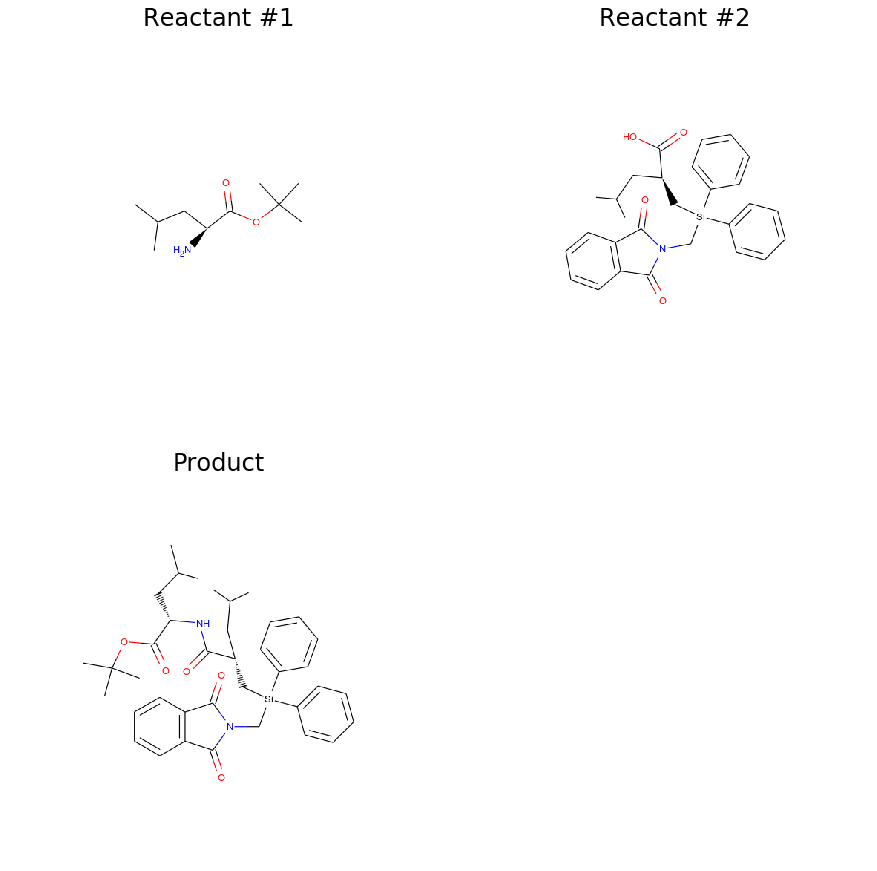

In [30]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, size=(500, 500)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 3)
ax.imshow(Draw.MolToImage(prd_mol, size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

Let's fix several drawing parameteres so as to get prettier pictures.

In [31]:
from copy import deepcopy

In [32]:
default_options = deepcopy(Draw.DrawingOptions)
Draw.DrawingOptions.colorBonds = False
Draw.DrawingOptions.noCarbonSymbols = True
Draw.DrawingOptions.selectColor = (0, 1, 0)
Draw.DrawingOptions.dotsPerAngstrom = 200
Draw.DrawingOptions.atomLabelFontSize = 20
Draw.DrawingOptions.atomLabelMinFontSize = 20
Draw.DrawingOptions.bondLineWidth = 5
Draw.DrawingOptions.defaultColor = (0, 0, 0)
Draw.DrawingOptions.radicalSymbol = "."

(-0.5, 499.5, 499.5, -0.5)

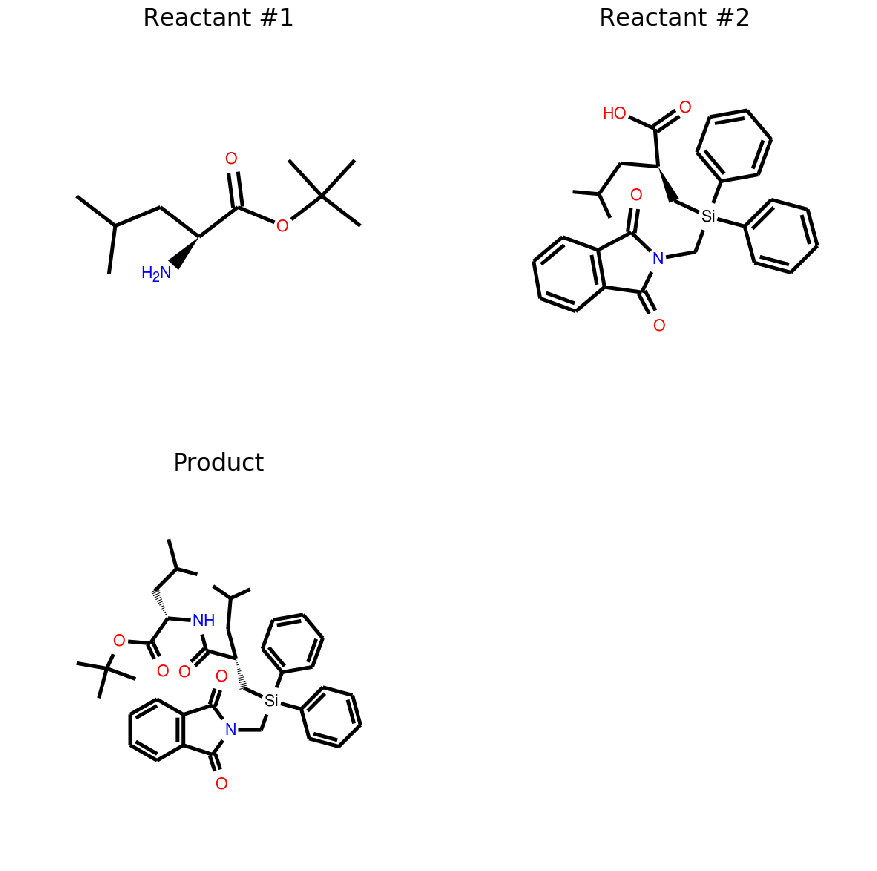

In [33]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, size=(500, 500)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 3)
ax.imshow(Draw.MolToImage(prd_mol, size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

# Transformation
What exactly changed during this chemical reaction? This case is quite simple: there is $H_2N-R_1$ group in the first reactant and $R_2-COOH$ group in the second reactant. They interact, forming so-called amide bond. The result is $R_1-NH-C(=O)-R_2$

Let's take a look to a couple of other reactions. To do so let's write helpers.

In [34]:
def get_reactants_and_products(reaction):
    rys = [c for c in reaction.getchildren() if c.tag == "RY"]
    assert len(rys) == 1
    ry = rys[0]
    reactants = [c.text for c in ry.getchildren() if c.tag == "RY.RCT"]
    products = [c.text for c in ry.getchildren() if c.tag == "RY.PRO"]
    reactant_mols = [Chem.MolFromMolBlock(r) for r in reactants]
    product_mols = [Chem.MolFromMolBlock(p) for p in products]
    return reactant_mols, product_mols

In [35]:
reaction = root.getchildren()[0].getchildren()[1]

In [36]:
reactants, products = get_reactants_and_products(reaction)
print(len(reactants), len(products))

2 1


In [37]:
rct_1_mol, rct_2_mol = reactants
prd_mol = products[0]

(-0.5, 499.5, 499.5, -0.5)

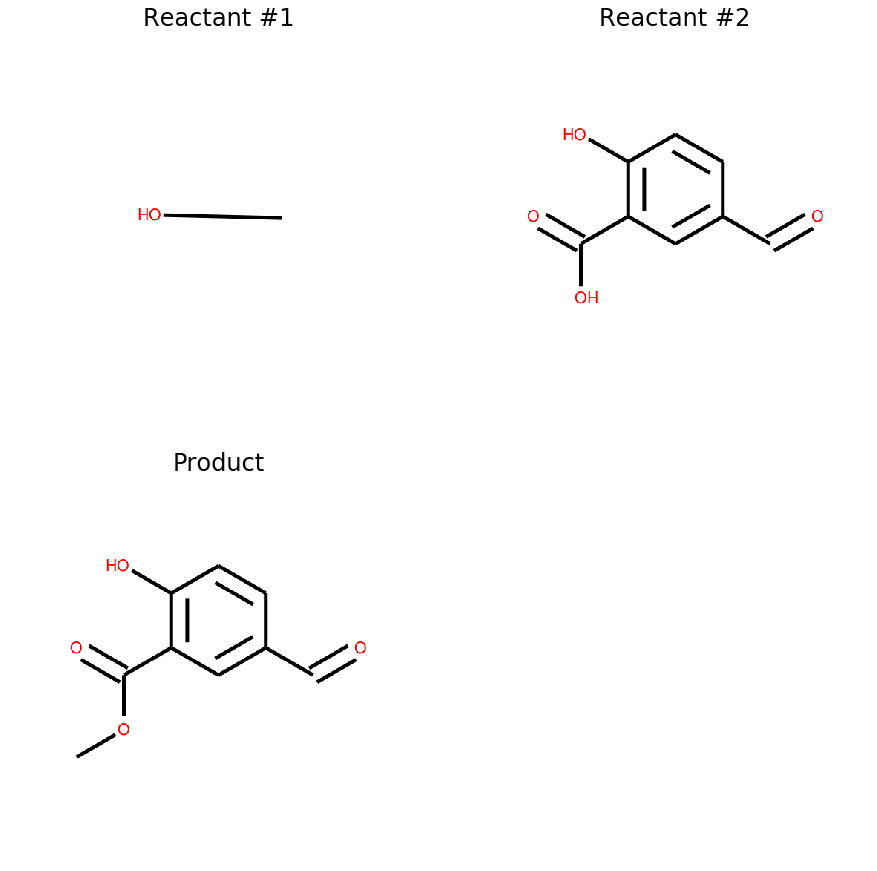

In [38]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_1_mol, size=(500, 500)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(rct_2_mol, size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 3)
ax.imshow(Draw.MolToImage(prd_mol, size=(500, 500)))
ax.set_title("Product", fontdict={"size": 24})
plt.axis('off')

Here we can see that $HOC$ and $HOOC-R$ converted into $COC(=O)-R$. But which oxygen disappeared and which one persisted?

In [39]:
reaction = root.getchildren()[0].getchildren()[2]
reactants, products = get_reactants_and_products(reaction)
print(len(reactants), len(products))

1 1


In [40]:
rct_mol = reactants[0]
prd_mol = products[0]

(-0.5, 499.5, 499.5, -0.5)

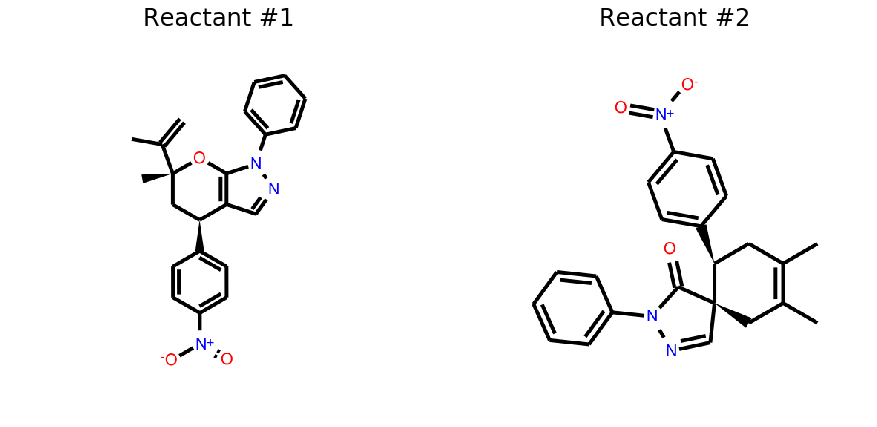

In [41]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(Draw.MolToImage(rct_mol, size=(500, 500)))
ax.set_title("Reactant #1", fontdict={"size": 24})
plt.axis('off')

ax = fig.add_subplot(2, 2, 2)
ax.imshow(Draw.MolToImage(prd_mol, size=(500, 500)))
ax.set_title("Reactant #2", fontdict={"size": 24})
plt.axis('off')

What we can say about the reaction? If I were an experienced chemist, I wouldn't have problems with determining atoms which changed their properties and those that stayed intact. However, I am not and that case is not a simple one, is it?  
The problem is even worse if you are going to desribe it to computer. You need to find common fuzzy substrctures between reactants and products. This fuzziness is hard to implement and in many cases will lead to incorrect reaction core. How could we address the problem?

RXNFILE is potentially interesting, because it describes reactions.  
Let's take a look to an example rxn file.

In [ ]:
!cat ../data/example.rxn

We can find here information about three molecules: two of them are reactants and the last one is product. The first block of molecule decription is about atoms: symbols (S, N, C, O, ...), coordinates and auxiliary info. The second block is about chemical bonds. We are interested in the first four columns: bond_index, first_atom, second_atom, bond_order.